# 로이터 뉴스 데이터 확인

In [2]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [275]:
# ~10000 순위 단어만 사용. 다른 높은 숫자들도 아예 없애는 것이 아닌, 특정 번호로 맵핑됨
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [276]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [277]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [278]:
print(y_train[0])
print(y_test[0])

3
3


In [279]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


### 데이터 분포 확인

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


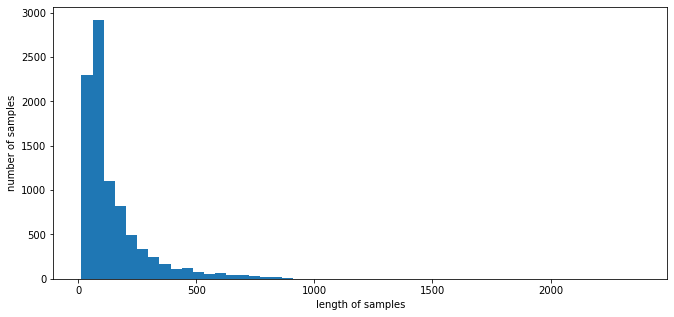

In [280]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

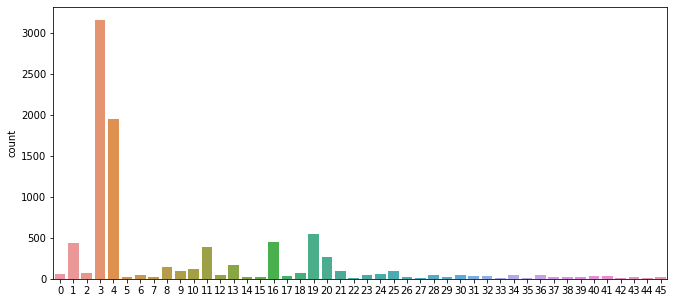

In [281]:
# 맞춰야하는 클래스 분포
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [282]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements))) # [클래스] / [빈도수]

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 데이터 복원

정수 시퀀스로 변환된 데이터를 텍스트로 돌린다.

In [283]:
# 단어-key : 정수-value dictionary
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [284]:
print(word_index['the'])
print(word_index['it'])

1
13


사실 word_index 정수 값에서 +3을 해야 고유한 value가 나온다 (로이터 데이터 특성)

In [285]:
# +3을 해주자
index_to_word = { index+3 : word for word, index in word_index.items() }

In [286]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [287]:
# +3을 해준 이유는 0, 1, 2 에 아래 토큰을 넣기 위해서다.
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어준다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

`<pad>` 토큰은 풀네임으로 padding이고, 길이를 맞출때 사용하는 비어있는(사용x) 토큰을 뜻한다.   
`<sos>` 토큰은 풀네임으로 start of sentence이고, 문장의 시작을 알리는 토큰을 뜻한다.   
`<unk>` 토큰은 풀네임으로 unknown이고, 모델이 인식할 수 없는 토큰을 뜻한다.   

In [288]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### OOV문제와 UNK토큰

위에서 train, test 분리했던 코드에서, `num_words=10000`를 주었다. 그 이상의 정수 번호인 단어들은 전부 정수 2 : `<UNK>`로 변환되어 로드된다.

In [289]:
# 한 정수 세트를 문장으로 변환해보자
sen1_nums = [4, 587, 23, 133, 6, 30, 515]
print(' '.join([index_to_word[index] for index in sen1_nums]))

the transaction is expected to be completed


In [290]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [291]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test[0]))

735


In [292]:
print(x_train[0])
print(x_test[0])

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program b

# 벡터화

In [293]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

이번 텍스트 분류는 기존의 머신러닝을 통해서 할 것이기에, 벡터화 방법도 인공 신경망이 아닌 방법으로 간다. BoW 가설을 기반으로 하는 **DTM과 TF-IDF** 행렬을 사용한다.

In [294]:
# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


뉴스의 총 데이터 수는 8992개, 불필요한 토큰을 제거하는 프로세스가 있기 때문에 9670개만 열로 나온다

In [295]:
# TF-IDF 행렬 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


In [296]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

추가적인 전처리를 하지 않는 이상 TF-IDF에서도 동일

## 나이브 베이즈 분류기

In [297]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [298]:
model = MultinomialNB() # 멀티노미얼 나이브 베이즈
model.fit(tfidfv, y_train)

MultinomialNB()

In [299]:
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


In [300]:
print(x_test[3])
print(y_test[3])

<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3
4


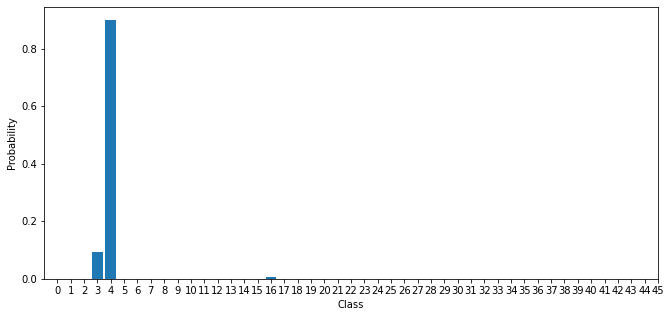

In [301]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [302]:
model.predict(tfidfv_test[3])

array([4])

90% 확률로 4번 클래스로 예측해냈다.

## F1-Score, Confusion Matrix

In [303]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

[분류성능평가지표 - Precision(정밀도), Recall(재현율) and Accuracy(정확도)](https://sumniya.tistory.com/26)

In [304]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

In [305]:
# confusion matrix 시각화
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

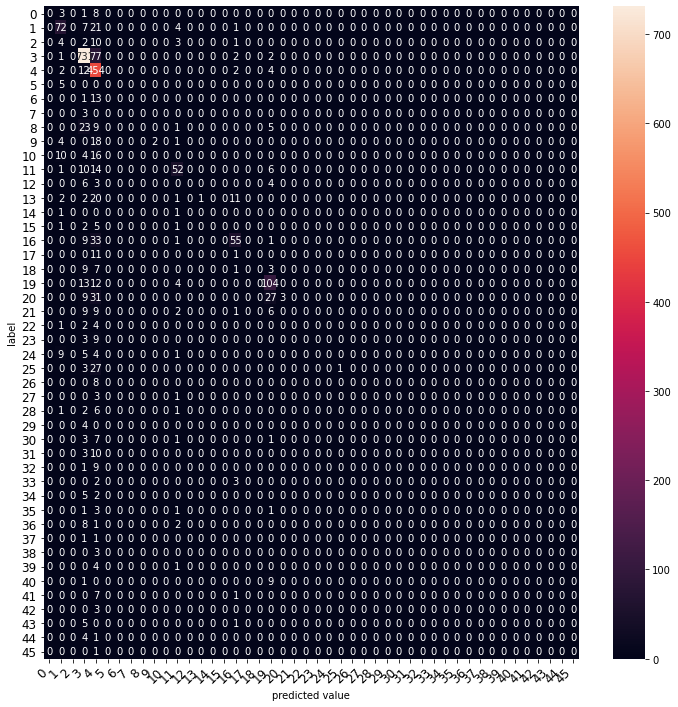

In [306]:
graph_confusion_matrix(model, tfidfv_test, y_test)

### Complement Naive Bayes Classifier(CNB)

데이터가 불균형할 경우 경정 경계의 가중치가 치우쳐져 모델이 특정 클래스를 선호할 수 있다.   
이를 보완한 것이 **컴플리먼트 나이브 베이즈 분류기**. 데이터 불균형을 고려하여 가중치를 부여.

In [307]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [308]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


나이브 베이즈 분류기의 정확도 66%보다 10% 높다.

In [309]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.64      0.88      0.74       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.75      0.92      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.50      0.13      0.21        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.55      0.73      0.63        83
          12       0.00      0.00      0.00        13
          13       0.58      0.59      0.59        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.79      0.73        99
          17       0.00    

### 로지스틱 회귀 (Logistic Regression)

In [310]:
lr = LogisticRegression(C=9670, penalty='l2') # 9670단어로 줄어든 만큼 수정해주자
lr.fit(tfidfv, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=9670)

In [311]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8081032947462155


In [312]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.79      0.77       105
           2       0.71      0.75      0.73        20
           3       0.92      0.93      0.93       813
           4       0.80      0.88      0.84       474
           5       1.00      0.20      0.33         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.64      0.71      0.67        38
           9       0.82      0.92      0.87        25
          10       0.93      0.87      0.90        30
          11       0.65      0.73      0.69        83
          12       0.57      0.31      0.40        13
          13       0.57      0.62      0.60        37
          14       0.50      0.50      0.50         2
          15       0.71      0.56      0.63         9
          16       0.70      0.75      0.72        99
          17       0.73    

### 서포트 벡터 머신 (Support Vactor Machine)

In [313]:
# 이진 분류에서 일대다(one-vs.-rest 또는 one-vs.-all) 방법을 통해, 클래스 수만큼 이진 분류 모델을 만든다.
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [314]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7782724844167409


In [315]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.71      0.71      0.71       105
           2       0.72      0.65      0.68        20
           3       0.90      0.92      0.91       813
           4       0.80      0.85      0.83       474
           5       0.00      0.00      0.00         5
           6       0.80      0.86      0.83        14
           7       0.50      0.33      0.40         3
           8       0.61      0.66      0.63        38
           9       0.80      0.80      0.80        25
          10       0.88      0.73      0.80        30
          11       0.62      0.76      0.68        83
          12       0.40      0.31      0.35        13
          13       0.56      0.51      0.54        37
          14       0.50      0.50      0.50         2
          15       0.75      0.33      0.46         9
          16       0.69      0.69      0.69        99
          17       1.00    

### 결정 트리 (Decision Tree)

In [316]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [317]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


In [318]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.42      0.53       105
           2       0.62      0.50      0.56        20
           3       0.93      0.83      0.88       813
           4       0.40      0.90      0.56       474
           5       0.00      0.00      0.00         5
           6       0.90      0.64      0.75        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.85      0.77      0.81        30
          11       0.64      0.51      0.56        83
          12       0.14      0.08      0.10        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.84      0.69        99
          17       0.00    

### 랜덤 포레스트 (Random Forest)

오버피팅되는 경우가 있는 결정트리를 해결하기 위해 앙상블로 해결한 것이 랜덤 포레스트

In [319]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [320]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


In [321]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.22      0.33      0.27        12
           1       0.45      0.77      0.57       105
           2       0.30      0.30      0.30        20
           3       0.82      0.90      0.86       813
           4       0.61      0.83      0.70       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.67      0.53      0.59        38
           9       0.70      0.28      0.40        25
          10       0.75      0.30      0.43        30
          11       0.55      0.59      0.57        83
          12       0.40      0.15      0.22        13
          13       0.37      0.19      0.25        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.59      0.59        99
          17       0.00    

### 그래디언트 부스팅 트리 (GradientBoostingClassifier)

그레디언트 부스팅은 랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.    
그래디언트 부스팅 트리는 일부 특성을 무시한다는 특징을 가지고 있다. 그래서 보통 랜덤 포레스트를 먼저 사용해보고, 성능이나 예측 시간 면에서 만족스럽지 않은 경우에 그래디언트 부스팅 트리를 시도해보는 것이 좋다.   
일반적으로 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠르다.   
정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델이다. 다만, 훈련 시간의 속도가 좀 오래 걸리고, 트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점이다.

In [322]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [323]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7666963490650045


In [324]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.77      0.68      0.72       105
           2       0.78      0.70      0.74        20
           3       0.88      0.91      0.89       813
           4       0.76      0.83      0.79       474
           5       0.50      0.20      0.29         5
           6       0.80      0.86      0.83        14
           7       1.00      0.33      0.50         3
           8       0.64      0.66      0.65        38
           9       0.74      0.80      0.77        25
          10       0.90      0.87      0.88        30
          11       0.63      0.64      0.63        83
          12       0.33      0.46      0.39        13
          13       0.62      0.49      0.55        37
          14       0.14      0.50      0.22         2
          15       0.38      0.33      0.35         9
          16       0.73      0.73      0.73        99
          17       0.27    

### 보팅

하드 보팅 : 결과물에 대한 최종값을 투표하여 결정   
소프트 보팅 : 최종값이 나올 확률값을 모두 더하여 최종 결과물에 대한 확률을 구하여 도출

In [325]:
# 로지스틱 회귀, CNB, 그래디언트 부스팅 트리로 소프트 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [326]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8116651825467498


In [327]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.77      0.74      0.76       105
           2       0.73      0.80      0.76        20
           3       0.92      0.94      0.93       813
           4       0.83      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.70      0.68      0.69        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.65      0.69      0.67        83
          12       0.46      0.46      0.46        13
          13       0.68      0.62      0.65        37
          14       0.14      0.50      0.22         2
          15       0.57      0.44      0.50         9
          16       0.72      0.75      0.73        99
          17       0.53    

# 프로젝트 : Vocabulary Size를 변경해서 시도해보기

위에서 Bow에서는 num_words를 10000개로 정했었다.   
이번 프로젝트에서는 단어 개수를 **제한 없이**, 그리고 **상위 5000개**만 사용해보자.

## 1. 모든 단어 사용

In [328]:
# 사용 횟수에 따른 정수 맵핑이 담겨있는 로이터 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [329]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3 : word for word, index in word_index.items() }

# +3을 해준 이유는 0, 1, 2 에 아래 토큰을 넣기 위해서다.
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어준다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
    
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


`<unk>`토큰 없이 전부 맵핑되어 있다.

### 벡터화

In [330]:
# 단어 수 세기
def count_word(data):
    num = 0
    for i in data:
        if max(i) > num:
            num = max(i)
    return num

In [331]:
print(max(count_word(x_train),count_word(x_test)))

30981


단어는 총 30981개가 사용되었다 (3개의 특수 토큰 포함)

In [332]:
# 문장 디코딩 함수

def decoding(corpus):
    decoded = []
    for i in range(len(corpus)):
        t = ' '.join([index_to_word[index] for index in corpus[i]])
        decoded.append(t)
    return decoded

In [333]:
x_train = decoding(x_train)
x_test = decoding(x_test)

In [334]:
print(x_train[0])
print(x_test[0])

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the exp

In [335]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# TF-IDF 행렬 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)
(8982, 26506)


30981개였던 단어가 26506개로 줄어들었다.

In [336]:
# 테스트 데이터도 벡터화 시킨다
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

### 모델학습

In [337]:
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

1. 로지스틱 회귀
2. 컴플리먼트 나이브 베이즈 분류기
3. 그래디언트 부스팅 분류기
4. 서포트 벡터 머신
5. 소프트 보팅 (위 네가지 모델)   
4가지 모델과 이들을 앙상블한 소프트 보팅으로 모델을 테스트 한다

### 1) CNB

In [338]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


In [339]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.63      0.88      0.73       105
           2       0.91      0.50      0.65        20
           3       0.87      0.91      0.89       813
           4       0.75      0.93      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.43      0.08      0.13        38
           9       0.81      0.88      0.85        25
          10       0.96      0.73      0.83        30
          11       0.55      0.67      0.61        83
          12       0.00      0.00      0.00        13
          13       0.62      0.54      0.58        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.77      0.71        99
          17       0.00    

### 2) 로지스틱 회귀

In [340]:
lr = LogisticRegression(C=26506, penalty='l2')
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8138913624220837


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [341]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.80      0.77       105
           2       0.70      0.70      0.70        20
           3       0.92      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      1.00      0.97        14
           7       1.00      0.67      0.80         3
           8       0.68      0.71      0.69        38
           9       0.81      0.84      0.82        25
          10       0.93      0.87      0.90        30
          11       0.67      0.73      0.70        83
          12       0.57      0.31      0.40        13
          13       0.62      0.62      0.62        37
          14       0.67      1.00      0.80         2
          15       0.71      0.56      0.63         9
          16       0.70      0.77      0.73        99
          17       0.70    

### 3) SVM

In [342]:
# 이진 분류에서 일대다(one-vs.-rest 또는 one-vs.-all) 방법을 통해, 클래스 수만큼 이진 분류 모델을 만든다.
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.780053428317008


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [343]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.72      0.74      0.73       105
           2       0.65      0.55      0.59        20
           3       0.91      0.92      0.91       813
           4       0.80      0.86      0.83       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.57      0.66      0.61        38
           9       0.81      0.84      0.82        25
          10       0.83      0.80      0.81        30
          11       0.63      0.75      0.69        83
          12       0.30      0.23      0.26        13
          13       0.59      0.51      0.55        37
          14       0.33      0.50      0.40         2
          15       0.20      0.11      0.14         9
          16       0.65      0.71      0.68        99
          17       0.71    

### 4) GBC

In [344]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7702582368655387


In [345]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.81      0.71      0.76       105
           2       0.58      0.70      0.64        20
           3       0.87      0.91      0.89       813
           4       0.78      0.86      0.82       474
           5       1.00      0.20      0.33         5
           6       0.77      0.71      0.74        14
           7       1.00      0.33      0.50         3
           8       0.60      0.63      0.62        38
           9       0.91      0.80      0.85        25
          10       0.79      0.77      0.78        30
          11       0.61      0.65      0.63        83
          12       0.50      0.46      0.48        13
          13       0.48      0.32      0.39        37
          14       0.00      0.00      0.00         2
          15       0.25      0.11      0.15         9
          16       0.72      0.71      0.71        99
          17       0.83    

### 5) 소프트 보팅

In [346]:
# 로지스틱 회귀, CNB, 그래디언트 부스팅 트리로 소프트 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=26506, penalty='l2')),
        ('cnb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0)),
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8178984861976848


In [347]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.80      0.75      0.77       105
           2       0.67      0.80      0.73        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.67      0.80         3
           8       0.69      0.71      0.70        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.66      0.70      0.68        83
          12       0.60      0.46      0.52        13
          13       0.67      0.65      0.66        37
          14       0.29      1.00      0.44         2
          15       0.40      0.22      0.29         9
          16       0.74      0.76      0.75        99
          17       0.78    

# 2. 5000개 단어 사용

In [348]:
# 사용 횟수에 따른 정수 맵핑이 담겨있는 로이터 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [349]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3 : word for word, index in word_index.items() }

# +3을 해준 이유는 0, 1, 2 에 아래 토큰을 넣기 위해서다.
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어준다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
    
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [350]:
# 단어 수 세기
def count_word(data):
    num = 0
    for i in data:
        if max(i) > num:
            num = max(i)
    return num

print(max(count_word(x_train),count_word(x_test)))

4999


In [351]:
# 문장 디코딩 함수

def decoding(corpus):
    decoded = []
    for i in range(len(corpus)):
        t = ' '.join([index_to_word[index] for index in corpus[i]])
        decoded.append(t)
    return decoded

In [352]:
x_train = decoding(x_train)
x_test = decoding(x_test)

In [353]:
print(x_train[0])
print(x_test[0])

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program b

확실히 10000개 단어 임베딩에 비해 <unk>토큰이 많이 보인다

In [354]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# TF-IDF 행렬 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)
(8982, 4867)


단어 개수 : 4999 > 4867

In [355]:
# 테스트 데이터도 벡터화 시킨다
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

### 1) CNB

In [356]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


In [357]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.63      0.86      0.73       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.74      0.92      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.57      0.21      0.31        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.76      0.63        83
          12       0.00      0.00      0.00        13
          13       0.69      0.59      0.64        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.67      0.79      0.72        99
          17       0.00    

### 2) 로지스틱 회귀

In [358]:
lr = LogisticRegression(C=4867, penalty='l2')
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.804986642920748


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [359]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.78      0.78       105
           2       0.73      0.80      0.76        20
           3       0.91      0.94      0.92       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.67      0.74      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.87      0.90        30
          11       0.62      0.72      0.67        83
          12       0.57      0.31      0.40        13
          13       0.59      0.62      0.61        37
          14       0.50      0.50      0.50         2
          15       0.83      0.56      0.67         9
          16       0.68      0.73      0.70        99
          17       0.82    

### 3) SVM

In [360]:
# 이진 분류에서 일대다(one-vs.-rest 또는 one-vs.-all) 방법을 통해, 클래스 수만큼 이진 분류 모델을 만든다.
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7782724844167409


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [361]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.72      0.73      0.73       105
           2       0.73      0.80      0.76        20
           3       0.90      0.90      0.90       813
           4       0.81      0.84      0.82       474
           5       0.00      0.00      0.00         5
           6       0.81      0.93      0.87        14
           7       1.00      0.33      0.50         3
           8       0.58      0.66      0.62        38
           9       0.75      0.84      0.79        25
          10       0.86      0.83      0.85        30
          11       0.64      0.77      0.70        83
          12       0.36      0.31      0.33        13
          13       0.59      0.62      0.61        37
          14       1.00      0.50      0.67         2
          15       0.75      0.33      0.46         9
          16       0.63      0.68      0.65        99
          17       1.00    

### 4) GBC

In [362]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.767586821015138


In [363]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.80      0.68      0.73       105
           2       0.70      0.70      0.70        20
           3       0.90      0.90      0.90       813
           4       0.76      0.83      0.79       474
           5       0.14      0.20      0.17         5
           6       0.93      0.93      0.93        14
           7       0.50      0.33      0.40         3
           8       0.64      0.66      0.65        38
           9       0.91      0.84      0.87        25
          10       0.87      0.87      0.87        30
          11       0.62      0.66      0.64        83
          12       0.46      0.46      0.46        13
          13       0.55      0.43      0.48        37
          14       0.08      0.50      0.14         2
          15       0.33      0.22      0.27         9
          16       0.72      0.77      0.75        99
          17       0.33    

### 5) 소프트 보팅

In [364]:
# 로지스틱 회귀, CNB, 그래디언트 부스팅 트리로 소프트 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=4867, penalty='l2')),
        ('cnb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0)),
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.813446126447017


In [365]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.75      0.77       105
           2       0.71      0.85      0.77        20
           3       0.92      0.94      0.93       813
           4       0.82      0.87      0.85       474
           5       0.33      0.20      0.25         5
           6       0.93      0.93      0.93        14
           7       0.67      0.67      0.67         3
           8       0.72      0.68      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.66      0.69      0.67        83
          12       0.50      0.46      0.48        13
          13       0.66      0.62      0.64        37
          14       0.10      0.50      0.17         2
          15       0.67      0.44      0.53         9
          16       0.74      0.74      0.74        99
          17       0.57    

# 머신러닝 모델 정확도 비교

### 5000개 단어를 활용한 텍스트 분류 모델 정확도

|모델|acuuracy|f1-score(macro avg)|f1-score(weighted avg)|
|------|---|---|---|
|CNB|0.77|0.48|0.75|
|**로지스틱 회귀**|0.80|0.65|0.80|
|SVM|0.78|0.61|0.77|
|GBC|0.77|0.58|0.77|
|**소프트 보팅**|0.81|0.66|0.81|   


### 10000개 단어를 활용한 텍스트 분류 모델 정확도

|모델|acuuracy|f1-score(macro avg)|f1-score(weighted avg)|
|------|---|---|---|
|CNB|0.77|0.48|0.75|
|로지스틱 회귀|0.81|0.64|0.80|
|SVM|0.78|0.59|0.77|
|GBC|0.77|0.58|0.76|
|**소프트 보팅**|0.81|0.66|0.81|   


### 모든 단어를 활용한 텍스트 분류 모델 정확도 (26506개)

|모델|acuuracy|f1-score(macro avg)|f1-score(weighted avg)|
|------|---|---|---|
|CNB|0.76|0.46|0.73|
|로지스틱 회귀|0.81|0.67|0.81|
|SVM|0.78|0.57|0.77|
|GBC|0.77|0.57|0.76|
|**소프트 보팅**|0.82|0.67|0.81|   


활용한 단어 수의 차이는 굉장히 크지만(5000/10000/26507), 성능에 있어선 큰 차이가 나지 않았다.   
모든 경우 로지스틱 회귀와 소프트 보팅 모델이 동일하게 성능이 가장 좋거나 후자가 미세하게 좋았다.   
다만 앙상블 모델인 보팅의 학습 속도가 굉장히 느린 것을 고려한다면, 로지스틱 회귀가 가장 우수한 결과를 보여주었다 볼 수 있다. 

# 딥러닝 모델 적용 (LSTM)

In [1]:
import tensorflow as tf

In [455]:
# 단어 수에서 큰 차이가 없었기에 5000개 단어로 적용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [456]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

문장길이 평균 :  145.96419665122906
문장길이 최대 :  2376
문장길이 표준편차 :  145.8784764459447


In [457]:
# 표준편차 2배로 주어 max_len을 적절히 챙겨감
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

pad_sequences maxlen :  437
전체 문장의 0.9438902743142145%가 maxlen 설정값 이내에 포함됩니다. 


In [458]:
# 437단어 maxlen 설정
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, padding='pre', maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, padding='pre', maxlen=maxlen)

In [459]:
# 단어 수 세기
def count_word(data):
    num = 0
    for i in data:
        if max(i) > num:
            num = max(i)
    return num

print(max(count_word(x_train),count_word(x_test)))

4999


단어 수는 그대로 총 5000개

In [460]:
from sklearn.model_selection import train_test_split

x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
print(x_train_split.shape)
print(y_train_split.shape)

(7185, 437)
(7185,)


In [461]:
vocab_size = 5000
word_vector_dim = 256

LSTM = tf.keras.Sequential()
LSTM.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim))
LSTM.add(tf.keras.layers.LSTM(512))
LSTM.add(tf.keras.layers.Dense(512, activation='relu'))
LSTM.add(tf.keras.layers.Dense(46, activation='softmax'))

LSTM.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 256)         1280000   
_________________________________________________________________
lstm_17 (LSTM)               (None, 512)               1574912   
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_30 (Dense)             (None, 46)                23598     
Total params: 3,141,166
Trainable params: 3,141,166
Non-trainable params: 0
_________________________________________________________________


In [462]:
from tensorflow.keras.callbacks import EarlyStopping

LSTM.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                   mode='min', 
                   verbose=1,
                   patience=4)

history_LSTM = LSTM.fit(x_train_split,
                    y_train_split,
                    epochs=20,
                    batch_size=64,
                    callbacks=es,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
113/113 [==============================] - 34s 284ms/step - loss: 2.6007 - accuracy: 0.3558 - val_loss: 1.9478 - val_accuracy: 0.4602
Epoch 2/20
113/113 [==============================] - 32s 280ms/step - loss: 1.8100 - accuracy: 0.5151 - val_loss: 1.7628 - val_accuracy: 0.5487
Epoch 3/20
113/113 [==============================] - 32s 280ms/step - loss: 1.7094 - accuracy: 0.5722 - val_loss: 1.7599 - val_accuracy: 0.5815
Epoch 4/20
113/113 [==============================] - 32s 280ms/step - loss: 1.4617 - accuracy: 0.6269 - val_loss: 1.5479 - val_accuracy: 0.6066
Epoch 5/20
113/113 [==============================] - 32s 281ms/step - loss: 1.2418 - accuracy: 0.6771 - val_loss: 1.5207 - val_accuracy: 0.6177
Epoch 6/20
113/113 [==============================] - 32s 282ms/step - loss: 1.1394 - accuracy: 0.6986 - val_loss: 1.5136 - val_accuracy: 0.6288
Epoch 7/20
113/113 [==============================] - 32s 281ms/step - loss: 0.9768 - accuracy: 0.7254 - val_loss: 1.4681 - val_ac

In [463]:
results = LSTM.evaluate(x_test,  y_test, verbose=2)

print(results)

71/71 - 5s - loss: 1.9602 - accuracy: 0.6656
[1.9601575136184692, 0.6656277775764465]


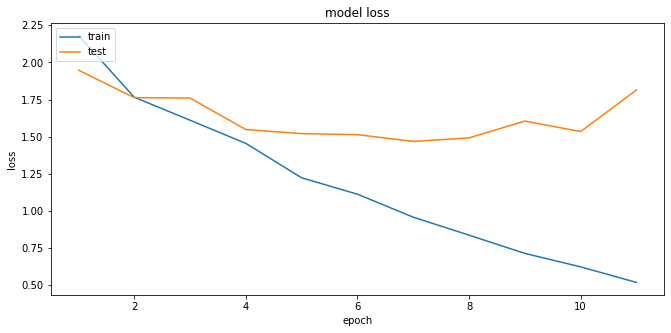

In [465]:
epochs = range(1, len(history_LSTM.history['accuracy']) + 1)
plt.plot(epochs, history_LSTM.history['loss'])
plt.plot(epochs, history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 모델 평가 및 결론

### 5000개 단어 사용
|모델|acuuracy|f1-score(macro avg)|f1-score(weighted avg)|
|------|---|---|---|
|LSTM|0.67|||
|**로지스틱 회귀**|0.80|0.65|0.80|   

LSTM 특성상 데이터 길이가 너무 긴 탓에(`maxlen=437`) 앞 단어를 기억하지 못하는 문제 때문에 성능을 발휘하지 못한 것으로 보인다. maxlen을 낮춘다 하여도(`maxlen=100`) 모델 성능이 나아지지는 않았다.   
데이터 길이에 있어서 문제가 없는 모델을 써야 성능이 올라갈 것으로 보이나, 머신러닝 모델도 준수한 성능을 보여주고 있어서 흥미로웠던 결과였다.

In [17]:
import tensorflow as tf

In [18]:
# 단어 수에서 큰 차이가 없었기에 5000개 단어로 적용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [19]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

문장길이 평균 :  145.96419665122906
문장길이 최대 :  2376
문장길이 표준편차 :  145.8784764459447


In [20]:
# 표준편차 2배로 주어 max_len을 적절히 챙겨감
# max_tokens = np.mean(num_tokens) + 1 * np.std(num_tokens)
# maxlen = int(max_tokens)
maxlen = 100
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

pad_sequences maxlen :  100
전체 문장의 0.8810117563234771%가 maxlen 설정값 이내에 포함됩니다. 


In [21]:
# 437단어 maxlen 설정
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, padding='pre', maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, padding='pre', maxlen=maxlen)

In [22]:
# 단어 수 세기
def count_word(data):
    num = 0
    for i in data:
        if max(i) > num:
            num = max(i)
    return num

print(max(count_word(x_train),count_word(x_test)))

4999


단어 수는 그대로 총 5000개

In [23]:
from sklearn.model_selection import train_test_split

x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
print(x_train_split.shape)
print(y_train_split.shape)

(7185, 100)
(7185,)


In [24]:
vocab_size = 5000
word_vector_dim = 128

LSTM = tf.keras.Sequential()
LSTM.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim))
LSTM.add(tf.keras.layers.LSTM(128))
LSTM.add(tf.keras.layers.Dense(128, activation='relu'))
LSTM.add(tf.keras.layers.Dense(46, activation='softmax'))

LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 46)                5934      
Total params: 794,030
Trainable params: 794,030
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

LSTM.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                   mode='min', 
                   verbose=1,
                   patience=4)

history_LSTM = LSTM.fit(x_train_split,
                    y_train_split,
                    epochs=20,
                    batch_size=64,
                    callbacks=es,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
113/113 [==============================] - 5s 30ms/step - loss: 2.8208 - accuracy: 0.3268 - val_loss: 2.0539 - val_accuracy: 0.4903
Epoch 2/20
113/113 [==============================] - 3s 26ms/step - loss: 1.9365 - accuracy: 0.5012 - val_loss: 1.7867 - val_accuracy: 0.5248
Epoch 3/20
113/113 [==============================] - 3s 26ms/step - loss: 1.6431 - accuracy: 0.5578 - val_loss: 1.7000 - val_accuracy: 0.5676
Epoch 4/20
113/113 [==============================] - 3s 26ms/step - loss: 1.5974 - accuracy: 0.5771 - val_loss: 1.5963 - val_accuracy: 0.5949
Epoch 5/20
113/113 [==============================] - 3s 26ms/step - loss: 1.4245 - accuracy: 0.6289 - val_loss: 1.4990 - val_accuracy: 0.6283
Epoch 6/20
113/113 [==============================] - 3s 26ms/step - loss: 1.2707 - accuracy: 0.6652 - val_loss: 1.4091 - val_accuracy: 0.6533
Epoch 7/20
113/113 [==============================] - 3s 26ms/step - loss: 1.0536 - accuracy: 0.7257 - val_loss: 1.3856 - val_accuracy: 0.6555

In [26]:
results = LSTM.evaluate(x_test,  y_test, verbose=2)

print(results)

71/71 - 0s - loss: 1.6092 - accuracy: 0.6585
[1.60921049118042, 0.6585040092468262]
